# Modeling Data in the Tidyverse Course Project

***

## Project Description

In this course, we have learned about modeling data in the Tidyverse in R. This project will give you the opportunity to practice those skills in greater depth. 

Here, we will continue to use consumer complaints data from the Consumer Complaint Database (CFPB) that was used in the Wranging Data in the Tidyverse Course Project. The CFPB is an independent agency of the United States government that promotes transparency and protects consumers by providing information needed to make decisions when choosing financial institutions including banking institutions, lenders, mortgage services, credit unions, securities firms, foreclosure services, and debt collectors. One of the purposes of the agency is to receive and process complaints and questions about consumer financial products and services. 

When a complaint is submitted by a consumer, the CFPB has to determine which category the complaint falls in (e.g. "Mortgage", "Student loan", etc). In this project, your goal will be to use the skills you have learned about in this course to build a classification algorithm to classify consumer complaints into one of four categories: "Credit card or prepaid card", "Mortgage", "Student loan", or "Vehicle loan or lease". 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

import sklearn

# import shap
# import eli5
# from IPython.display import display
import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta


import scipy.stats

#import pandas_profiling
#from pandas_profiling import ProfileReport

#import graphviz

#import xgboost as xgb
#from xgboost import XGBClassifier, XGBRegressor
#from xgboost import to_graphviz, plot_importance

#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
#from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)


from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, KFold, RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
#from sklearn.pipeline import Pipeline
#from sklearn.feature_selection import RFE, RFECV, SelectKBest, f_classif, f_regression, chi2
#from sklearn.inspection import permutation_importance

from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


#from tpot import TPOTClassifier, TPOTRegressor
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')


# Use Feature-Engine library

#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce


#from pycaret.classification import *
#from pycaret.clustering import *
#from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("data_complaints_train.csv")

In [3]:
df

,Product,Consumer complaint narrative,Company,State,ZIP code,Submitted via
0,Credit card or prepaid card,I initially in writing to Chase Bank in late X...,JPMORGAN CHASE & CO.,CT,064XX,Web
1,Mortgage,My ex husband and myself had a mobile home ( H...,Ditech Financial LLC,GA,None,Web
2,Student loan,I was a student at XXXX XXXX from XX/XX/XXXX-X...,"Navient Solutions, LLC.",IN,463XX,Web
3,Credit card or prepaid card,It has come to my attention the CITI group is ...,"CITIBANK, N.A.",MI,490XX,Web
4,Credit card or prepaid card,This banks new firearm policies run counter to...,"CITIBANK, N.A.",MI,480XX,Web
...,...,...,...,...,...,...
90970,Credit card or prepaid card,This involves a Chase Advantage ( checking ) a...,JPMORGAN CHASE & CO.,WV,260XX,Web
90971,Vehicle loan or lease,"I sent a letter to XXXX in XXXX, with signatu...","Byrider Franchising, LLC",LA,703XX,Web
90972,Student loan,One component of the PSLF program that I and s...,AES/PHEAA,VA,None,Web
90973,Credit card or prepaid card,i have been an american express customer for y...,AMERICAN EXPRESS COMPANY,NJ,None,Web


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90975 entries, 0 to 90974
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Product                       90975 non-null  object
 1   Consumer complaint narrative  90975 non-null  object
 2   Company                       90975 non-null  object
 3   State                         90975 non-null  object
 4   ZIP code                      90975 non-null  object
 5   Submitted via                 90975 non-null  object
dtypes: object(6)
memory usage: 4.2+ MB


In [5]:
df.describe(include='all')

,Product,Consumer complaint narrative,Company,State,ZIP code,Submitted via
count,90975,90975,90975,90975,90975,90975
unique,4,90240,1497,62,5484,1
top,Credit card or prepaid card,This particular account situation that is late...,"CITIBANK, N.A.",CA,None,Web
freq,38294,125,6520,13552,21892,90975


In [6]:
df.shape

(90975, 6)

In [7]:
df.columns

Index(['Product', 'Consumer complaint narrative', 'Company', 'State', 'ZIP code', 'Submitted via'], dtype='object')

## Data Preprocessing

### Drop unwanted features

In [8]:
df.columns

Index(['Product', 'Consumer complaint narrative', 'Company', 'State', 'ZIP code', 'Submitted via'], dtype='object')

In [9]:
df.drop(["Submitted via"],axis=1,inplace=True)

In [10]:
df.head()

,Product,Consumer complaint narrative,Company,State,ZIP code
0,Credit card or prepaid card,I initially in writing to Chase Bank in late X...,JPMORGAN CHASE & CO.,CT,064XX
1,Mortgage,My ex husband and myself had a mobile home ( H...,Ditech Financial LLC,GA,None
2,Student loan,I was a student at XXXX XXXX from XX/XX/XXXX-X...,"Navient Solutions, LLC.",IN,463XX
3,Credit card or prepaid card,It has come to my attention the CITI group is ...,"CITIBANK, N.A.",MI,490XX
4,Credit card or prepaid card,This banks new firearm policies run counter to...,"CITIBANK, N.A.",MI,480XX


### Treat Missing Values

In [11]:
df.Company.unique()

array(['JPMORGAN CHASE & CO.', 'Ditech Financial LLC',
       'Navient Solutions, LLC.', ..., 'VIP Mortgage Inc.',
       'Dorough & Dorough, LLC', 'Fidelity Direct Mortgage, LLC'],
      dtype=object)

In [12]:
df.State.unique()

array(['CT', 'GA', 'IN', 'MI', 'FL', 'WA', 'CA', 'VA', 'AZ', 'NY', 'TN',
       'TX', 'IL', 'IA', 'OH', 'MA', 'NV', 'NM', 'MN', 'NJ', 'NC', 'UT',
       'AL', 'LA', 'MD', 'MO', 'AR', 'PA', 'SC', 'OK', 'KS', 'CO', 'DE',
       'DC', 'WI', 'AK', 'ID', 'ME', 'OR', 'NH', 'RI', 'KY', 'HI', 'MS',
       'VT', 'UNITED STATES MINOR OUTLYING ISLANDS', 'SD', 'WV', 'None',
       'ND', 'MT', 'PR', 'NE', 'WY', 'AP', 'GU', 'AE', 'VI', 'AA', 'AS',
       'FM', 'MH'], dtype=object)

In [13]:
df["ZIP code"].unique()

array(['064XX', 'None', '463XX', ..., '32159', '77230', '07042'],
      dtype=object)

In [14]:
df["State"] = df["State"].replace(to_replace="None", value=np.nan)

In [15]:
df["ZIP code"] = df["ZIP code"].replace(to_replace="None", value=np.nan)

In [16]:
(df.Company == "None").value_counts()

False    90975
Name: Company, dtype: int64

In [17]:
df.isnull().sum()

Product                             0
Consumer complaint narrative        0
Company                             0
State                             349
ZIP code                        21892
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

Product                         0
Consumer complaint narrative    0
Company                         0
State                           0
ZIP code                        0
dtype: int64

In [20]:
df.shape

(69069, 5)

### Treat Duplicate Values

In [21]:
df.duplicated(keep='first').sum()

101

In [22]:
#df[df.duplicated(keep=False)] #Check duplicate values

In [23]:
#df.drop_duplicates(ignore_index=True, inplace=True)

### Feature Engineering

In [24]:
df["ZIP code"] = df["ZIP code"].replace(to_replace="X", value="", regex=True)

In [25]:
df["ZIP code"]

0        064
2        463
3        490
4        480
5        331
        ... 
90968    440
90969    752
90970    260
90971    703
90974    123
Name: ZIP code, Length: 69069, dtype: object

In [26]:
df["ZIP code"].unique()

array(['064', '463', '490', ..., '32159', '77230', '07042'], dtype=object)

In [27]:
df["ziplength"] = df["ZIP code"].apply(len)

In [28]:
df.ziplength.unique()

array([3, 5], dtype=int64)

In [29]:
df["complength"] = df["Company"].apply(len)

In [30]:
df.head()

,Product,Consumer complaint narrative,Company,State,ZIP code,ziplength,complength
0,Credit card or prepaid card,I initially in writing to Chase Bank in late X...,JPMORGAN CHASE & CO.,CT,064,3,20
2,Student loan,I was a student at XXXX XXXX from XX/XX/XXXX-X...,"Navient Solutions, LLC.",IN,463,3,23
3,Credit card or prepaid card,It has come to my attention the CITI group is ...,"CITIBANK, N.A.",MI,490,3,14
4,Credit card or prepaid card,This banks new firearm policies run counter to...,"CITIBANK, N.A.",MI,480,3,14
5,Credit card or prepaid card,I only use my walmart store card to keep from ...,SYNCHRONY FINANCIAL,FL,331,3,19


In [31]:
df["custlength"] = df["Consumer complaint narrative"].apply(len)

In [32]:
df.head()

,Product,Consumer complaint narrative,Company,State,ZIP code,ziplength,complength,custlength
0,Credit card or prepaid card,I initially in writing to Chase Bank in late X...,JPMORGAN CHASE & CO.,CT,064,3,20,813
2,Student loan,I was a student at XXXX XXXX from XX/XX/XXXX-X...,"Navient Solutions, LLC.",IN,463,3,23,966
3,Credit card or prepaid card,It has come to my attention the CITI group is ...,"CITIBANK, N.A.",MI,490,3,14,520
4,Credit card or prepaid card,This banks new firearm policies run counter to...,"CITIBANK, N.A.",MI,480,3,14,506
5,Credit card or prepaid card,I only use my walmart store card to keep from ...,SYNCHRONY FINANCIAL,FL,331,3,19,948


In [33]:
df.columns

Index(['Product', 'Consumer complaint narrative', 'Company', 'State', 'ZIP code', 'ziplength', 'complength', 'custlength'], dtype='object')

In [34]:
df.drop(['Consumer complaint narrative', 'Company', 'State', 'ZIP code'],axis=1,inplace=True)

In [35]:
df.head()

,Product,ziplength,complength,custlength
0,Credit card or prepaid card,3,20,813
2,Student loan,3,23,966
3,Credit card or prepaid card,3,14,520
4,Credit card or prepaid card,3,14,506
5,Credit card or prepaid card,3,19,948


In [36]:
df.Product.value_counts()

Credit card or prepaid card    29319
Mortgage                       23489
Student loan                    9117
Vehicle loan or lease           7144
Name: Product, dtype: int64

In [37]:
encoder = LabelEncoder()

In [38]:
df["Product"] = encoder.fit_transform(df["Product"])

In [91]:
df.head()

,Product,ziplength,complength,custlength
0,0,3,20,813
1,2,3,23,966
2,0,3,14,520
3,0,3,14,506
4,0,3,19,948


In [92]:
# Credit card or prepaid card = 0
# Mortgage = 1
# Student loan = 2
# Vehicle loan or lease = 3


df.Product.value_counts()

0    29319
1    23489
2     9117
3     7144
Name: Product, dtype: int64

In [40]:
df.reset_index(inplace=True, drop=True)

In [41]:
df.head()

,Product,ziplength,complength,custlength
0,0,3,20,813
1,2,3,23,966
2,0,3,14,520
3,0,3,14,506
4,0,3,19,948


In [42]:
df.columns

Index(['Product', 'ziplength', 'complength', 'custlength'], dtype='object')

In [43]:
df2 = df[['ziplength', 'complength', 'custlength','Product']]

In [44]:
df2.head()

,ziplength,complength,custlength,Product
0,3,20,813,0
1,3,23,966,2
2,3,14,520,0
3,3,14,506,0
4,3,19,948,0


### Create and save processed dataset

In [45]:
#df2.to_csv("train.csv",index=False)

In [46]:
df2.shape

(69069, 4)

### Train Test Split

In [47]:
X = df2.iloc[:,:3]
y = df2.iloc[:,3]

### Treat Imbalance Data

In [48]:
#y.value_counts()

In [49]:
#ros = RandomOverSampler(sampling_strategy='all',random_state=0)

In [50]:
#new_X, new_y = ros.fit_resample(X, y)

In [51]:
#new_y[].value_counts()

In [52]:
#new_X

### Train Test Split Cont'd

In [53]:
X.values, y.values

(array([[   3,   20,  813],
        [   3,   23,  966],
        [   3,   14,  520],
        ...,
        [   3,   20, 1455],
        [   3,   24,  939],
        [   3,   30,   61]], dtype=int64),
 array([0, 2, 0, ..., 0, 3, 1]))

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55255, 3), (13814, 3), (55255,), (13814,))

## Feature Scaling

In [56]:
X_train

,ziplength,complength,custlength
65086,3,20,2479
43364,3,27,1519
64246,3,33,1497
17765,3,32,2655
38787,3,37,1474
...,...,...,...
21243,3,33,655
45891,3,38,926
42613,3,27,761
43567,3,30,2889


In [57]:
scaler = StandardScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train)

In [59]:
X_test_scaled = scaler.transform(X_test)

In [60]:
X_train_scaled

array([[-0.37408082, -0.41375478,  0.59715483],
       [-0.37408082,  0.44333529,  0.02127045],
       [-0.37408082,  1.17798391,  0.00807309],
       ...,
       [-0.37408082,  0.44333529, -0.43343826],
       [-0.37408082,  0.8106596 ,  0.84310545],
       [-0.37408082, -0.29131334, -0.48022887]])

In [61]:
X_test_scaled

array([[-0.37408082,  0.44333529, -0.67578961],
       [-0.37408082,  1.17798391,  0.30081432],
       [-0.37408082, -0.41375478, -0.61460189],
       ...,
       [-0.37408082,  1.17798391, -0.37465007],
       [-0.37408082,  0.07601097, -0.35365428],
       [ 2.67321914, -0.29131334,  3.59175361]])

### Model Training

## Using Classification Models

In [62]:
classi_model = GradientBoostingClassifier()

In [63]:
classi_model.fit(X_train_scaled,y_train)

GradientBoostingClassifier()

In [64]:
y_pred = classi_model.predict(X_test_scaled)

In [65]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

### Model Evaluation

In [66]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[4392, 1174,  112,  168],
       [1786, 2724,   89,  122],
       [ 247,  174, 1340,   36],
       [ 441,  450,  115,  444]], dtype=int64)

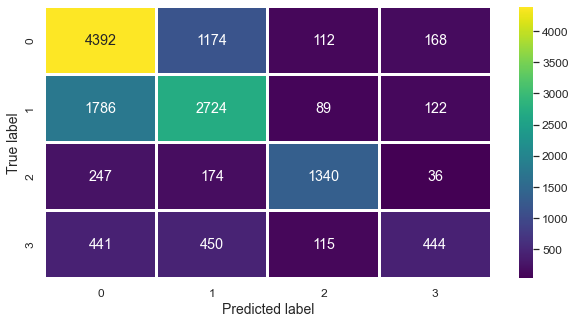

In [67]:
fig , ax = plt.subplots(figsize=(10,5))
sns.heatmap(cm, annot=True,fmt='.4g',linewidths=2, cmap='viridis')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      5846
           1       0.60      0.58      0.59      4721
           2       0.81      0.75      0.78      1797
           3       0.58      0.31      0.40      1450

    accuracy                           0.64     13814
   macro avg       0.66      0.60      0.61     13814
weighted avg       0.64      0.64      0.64     13814



### Plot Feature Importances

In [69]:
classi_model.feature_importances_

array([0.00299503, 0.94943115, 0.04757383])

In [70]:
feat_importances = pd.Series(classi_model.feature_importances_, index=X.columns)

In [71]:
feat_importances

ziplength    0.00
complength   0.95
custlength   0.05
dtype: float64

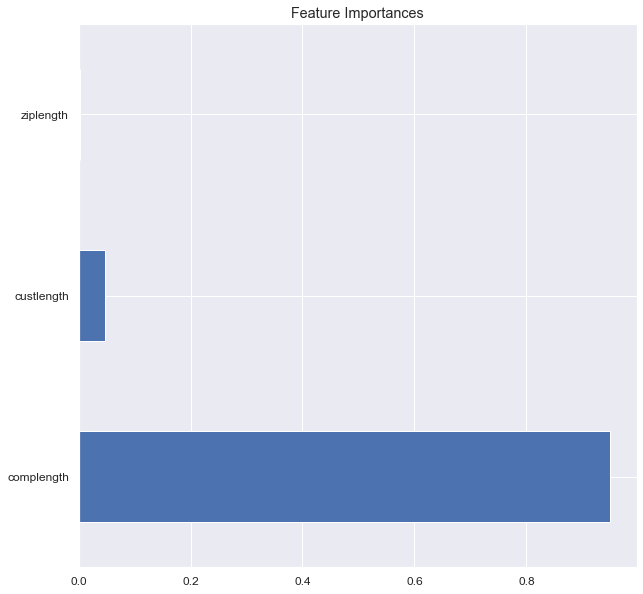

In [72]:
feat_importances.nlargest(10).plot(kind='barh', figsize=(10,10))
plt.title('Feature Importances')
plt.show()

### Test Data 

In [73]:
df3 = pd.read_csv("data_complaints_test.csv")
df3

,problem_id,Consumer complaint narrative,Company,State,ZIP code,Submitted via
0,1,I have multiple lateness/missed payments on my...,"ECMC Group, Inc.",NY,112XX,Web
1,2,I lost my job in XXXX due to the coronavirus a...,Michael Wayne Investment,VA,234XX,Web
2,3,I had contacted great lakes about my student l...,"Nelnet, Inc.",AR,727XX,Web
3,4,Wells Fargo Home Mortgage put me in a payment ...,WELLS FARGO & COMPANY,PA,189XX,Web
4,5,We had a loan through Kia Motors Finance on ou...,HYUNDAI CAPITAL AMERICA,IN,471XX,Web
5,6,I have received a billing statement from HOME ...,"CITIBANK, N.A.",TX,750XX,Web
6,7,I applied for a Home Depot credit card on XX/X...,"CITIBANK, N.A.",AZ,None,Web
7,8,I have a PayPal Master card via Sychrony Bank....,SYNCHRONY FINANCIAL,TX,None,Web
8,9,On XXXX XX/XX/XXXX I received a response from ...,WELLS FARGO & COMPANY,MI,481XX,Web
9,10,XX/XX/2020 : I called the company Westlake Fin...,"Westlake Services, LLC",CA,945XX,Web


In [74]:
df3["State"] = df3["State"].replace(to_replace="None", value=np.nan)

In [75]:
#df3["ZIP code"] = df3["ZIP code"].replace(to_replace="None", value=np.nan)

In [76]:
df3["ZIP code"] = df3["ZIP code"].replace(to_replace="X", value="", regex=True)

In [77]:
df3["ZIP code"]

0      112
1      234
2      727
3      189
4      471
5      750
6     None
7     None
8      481
9      945
10     957
11     750
12     911
13     080
14     480
15     234
16     930
17    None
18    None
19     641
Name: ZIP code, dtype: object

In [78]:
df3["ZIP code"].unique()

array(['112', '234', '727', '189', '471', '750', 'None', '481', '945',
       '957', '911', '080', '480', '930', '641'], dtype=object)

In [79]:
df3.isnull().sum()

problem_id                      0
Consumer complaint narrative    0
Company                         0
State                           0
ZIP code                        0
Submitted via                   0
dtype: int64

In [80]:
df3["ziplength"] = df3["ZIP code"].apply(len)

In [81]:
df3.ziplength.unique()

array([3, 4], dtype=int64)

In [82]:
df3["complength"] = df3["Company"].apply(len)

In [83]:
df3["custlength"] = df3["Consumer complaint narrative"].apply(len)

In [84]:
df3.head()

,problem_id,Consumer complaint narrative,Company,State,ZIP code,Submitted via,ziplength,complength,custlength
0,1,I have multiple lateness/missed payments on my...,"ECMC Group, Inc.",NY,112,Web,3,16,338
1,2,I lost my job in XXXX due to the coronavirus a...,Michael Wayne Investment,VA,234,Web,3,24,1416
2,3,I had contacted great lakes about my student l...,"Nelnet, Inc.",AR,727,Web,3,12,1271
3,4,Wells Fargo Home Mortgage put me in a payment ...,WELLS FARGO & COMPANY,PA,189,Web,3,21,1338
4,5,We had a loan through Kia Motors Finance on ou...,HYUNDAI CAPITAL AMERICA,IN,471,Web,3,23,970


In [85]:
df3.columns

Index(['problem_id', 'Consumer complaint narrative', 'Company', 'State', 'ZIP code', 'Submitted via', 'ziplength', 'complength', 'custlength'], dtype='object')

In [86]:
df3.drop(['problem_id','Consumer complaint narrative', 'Company', 'State', 'ZIP code', 'Submitted via'],axis=1,inplace=True)

In [87]:
df3.head()

,ziplength,complength,custlength
0,3,16,338
1,3,24,1416
2,3,12,1271
3,3,21,1338
4,3,23,970


In [88]:
#df3.to_csv("test.csv",index=False)

### Prediction

In [89]:
classi_model.predict(df3)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
pd.DataFrame(classi_model.predict(df3))

,0
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


#### Python code done by Dennis